## Perceptron - Linear classifier binary

In [1]:
# Import the necessary library
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the necessary library
import numpy as np
 
# Build the Perceptron Model
class Perceptron:
     
    def __init__(self, num_inputs, learning_rate=0.01):
        # Initialize the weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate
     
    # Define the first linear layer 
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + + self.weights[0] # @ np.dot and + + is array addition
        return Z
     
    # Define the Heaviside Step function.
    def Heaviside_step_fn(self, z):
        if z >= 0:
            return 1
        else:
            return 0
         
    # Define the Prediction
    def predict(self, inputs):
        Z = self.linear(inputs)
        try:
            pred = []
            for z in Z:
                pred.append(self.Heaviside_step_fn(z))
        except:
            return self.Heaviside_step_fn(Z)
        return pred
     
    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction-target)
        return loss
     
    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0]  += self.learning_rate * error
         
    # Fit the model
    def fit(self, X, y, num_epochs):
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

In [13]:
input=np.array([1,2])
weight = np.array([0.1,0.1,0.2])
input @ weight[1:].T + + weight[0]

0.6

In [34]:
 # Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2, 
                  centers=2, 
                  cluster_std=3,
                  random_state=23)

In [35]:
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [17]:
# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Set the random seed legacy
np.random.seed(23)

In [18]:
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])
 
# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)
 
# Prediction
pred = perceptron.predict(X_test)
 

In [ ]:
pred

In [20]:
# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

Accuracy: 0.975


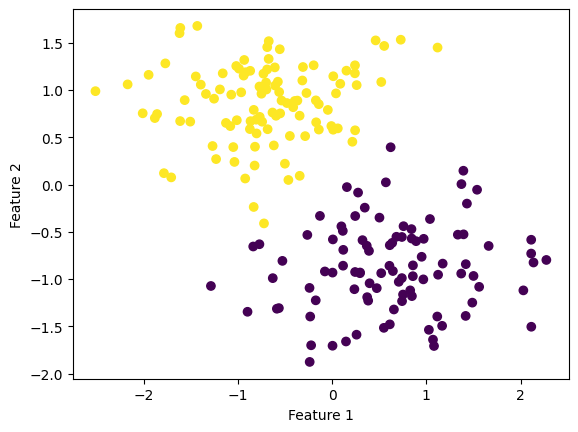

In [21]:
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Train in pytorch

In [22]:
# Import the necessary libraries
import torch
import torch.nn as nn

In [23]:
# Define the Perceptron model
class Perceptron(nn.Module):
	def __init__(self, num_inputs):
		super(Perceptron, self).__init__()
		self.linear = nn.Linear(in_features=num_inputs, out_features=1, bias=True)
		
	# Heaviside Step function
	def heaviside_step_fn(self,Z):
		Class = []
		for z in Z:
			if z >= 0:
				Class.append(1)
			else:
				Class.append(0)
		return torch.tensor(Class)
	
	def forward(self, x):
		Z = self.linear(x)
		return self.heaviside_step_fn(Z)

In [37]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False) # Convert to 32 bit float
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False) # Is True if gradients need to be computed for this Tensor, False otherwise.
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

In [36]:
X_train

array([[ 5.31743776, -2.2589225 ],
       [ 2.2032999 ,  5.96153073],
       [ 1.53214597, -4.78851595],
       ...,
       [-0.24014368, -0.36881227],
       [-3.57162532, 12.63251421],
       [ 3.54633624, -3.2234867 ]])

In [38]:
X_train 

tensor([[ 5.3174, -2.2589],
        [ 2.2033,  5.9615],
        [ 1.5321, -4.7885],
        ...,
        [-0.2401, -0.3688],
        [-3.5716, 12.6325],
        [ 3.5463, -3.2235]])

In [25]:
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
	cost = y_pred-Y
	return cost

# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data

In [26]:
num_epochs = 10
for epoch in range(num_epochs):
	Losses = 0
	for Input, Class in zip(X_train, y_train):
		# Forward pass
		predicted_class = perceptron(Input)
		error = loss(predicted_class, Class)
		Losses += error
		# Perceptron Learning Rule

		# Model Parameter
		w = perceptron.linear.weight
		b = perceptron.linear.bias

		# Matually Update the model parameter
		w = w - learning_rate * error * Input
		b = b - learning_rate * error

		# assign the weight & bias parameter to the linear layer
		perceptron.linear.weight = nn.Parameter(w)
		perceptron.linear.bias = nn.Parameter(b)
	print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
		epoch+1,num_epochs,
		w.detach().numpy(),
		b.detach().numpy(),
		Losses.item()))
	
# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

Epoch [1/10], weight:[[ 0.00346518 -0.02104771]], bias:[0.00091545] Loss: 20.0000
Epoch [2/10], weight:[[ 0.00477435 -0.02031215]], bias:[0.00091545] Loss: 0.0000
Epoch [3/10], weight:[[ 0.00503052 -0.0198241 ]], bias:[0.00091545] Loss: 0.0000
Epoch [4/10], weight:[[ 0.00351588 -0.01968565]], bias:[0.00091545] Loss: 0.0000
Epoch [5/10], weight:[[ 0.00482505 -0.01895009]], bias:[0.00091545] Loss: 0.0000
Epoch [6/10], weight:[[ 0.00331041 -0.01881165]], bias:[0.00091545] Loss: 0.0000
Epoch [7/10], weight:[[ 0.00461958 -0.01807609]], bias:[0.00091545] Loss: 0.0000
Epoch [8/10], weight:[[ 0.00310495 -0.01793764]], bias:[0.00091545] Loss: 0.0000
Epoch [9/10], weight:[[ 0.00441412 -0.01720208]], bias:[0.00091545] Loss: 0.0000
Epoch [10/10], weight:[[ 0.00289948 -0.01706364]], bias:[0.00091545] Loss: 0.0000


In [27]:
accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

Accuracy on Test Dataset: 0.9900000095367432


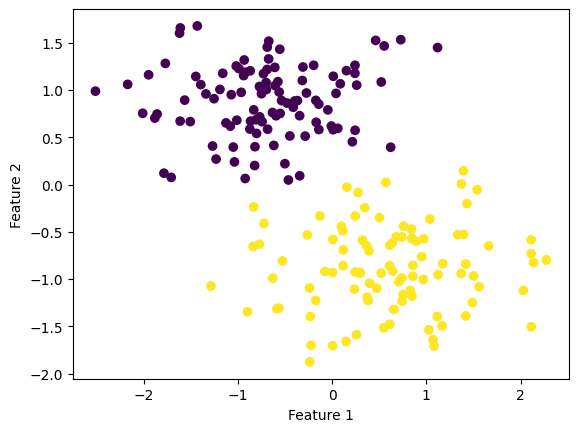

In [28]:
# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()